<a href="https://colab.research.google.com/github/Ghzraza/cortical-dynamics-simulator/blob/main/two_neuron_toy_sim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Cortical Dynamics Simulator-Two Neuron Toy Model
This simple model explores how excitatory (E) and inhibitory (I) neurons interact under varying stress-like inputs.
# Author: Ghazal Raza
# Goal: Explore excitatory–inhibitory balance and stress effects in a toy cortical network.

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Simulation parameters
n_exc = 80        # number of excitatory neurons
n_inh = 20        # number of inhibitory neurons
T = 1000          # total time steps
dt = 0.1          # time step size


In [3]:
# Neuron parameters
tau = 10          # time constant (how fast voltage changes)
exc_weight = 0.1  # excitatory connection strength
inh_weight = 0.4  # inhibitory connection strength
stress_level = 0.5  # external "stress" input amplitude

In [4]:
# Initial activity (membrane potentials)
exc_activity = np.random.rand(n_exc)
inh_activity = np.random.rand(n_inh)

# Record history
exc_history = []
inh_history = []

In [5]:
for t in range(int(T/dt)):
    # Compute average activities
    exc_mean = np.mean(exc_activity)
    inh_mean = np.mean(inh_activity)

    # External "stress" noise input
    stress_input = stress_level * np.random.randn(n_exc)

    # Update excitatory neurons
    d_exc = (-exc_activity + exc_weight*exc_mean - inh_weight*inh_mean + stress_input) / tau
    exc_activity += d_exc * dt

    # Update inhibitory neurons (they respond to excitatory drive)
    d_inh = (-inh_activity + exc_weight*exc_mean) / tau
    inh_activity += d_inh * dt

    # Record
    exc_history.append(np.mean(exc_activity))
    inh_history.append(np.mean(inh_activity))

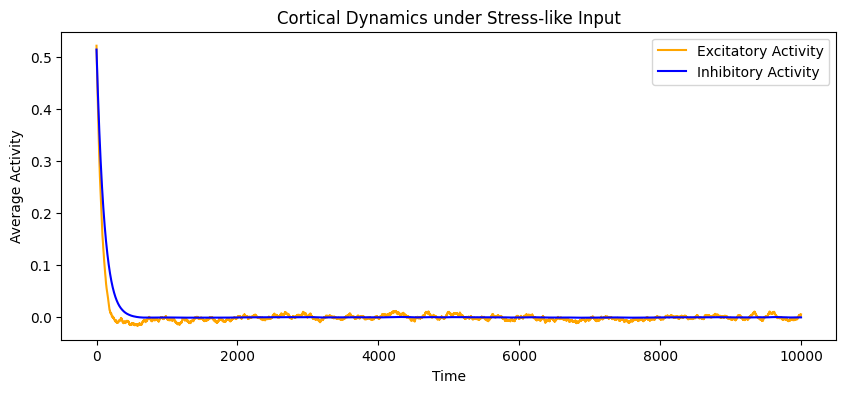

In [6]:
plt.figure(figsize=(10,4))
plt.plot(exc_history, label='Excitatory Activity', color='orange')
plt.plot(inh_history, label='Inhibitory Activity', color='blue')
plt.xlabel('Time')
plt.ylabel('Average Activity')
plt.title('Cortical Dynamics under Stress-like Input')
plt.legend()
plt.show()